In [7]:
import sounddevice as sd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker, cm
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.signal.signaltools import wiener
from scipy import signal
import IPython.display as ipd

from scipy.fft import rfft, rfftfreq, fft, fftfreq, dct, idct

# Set plotting parameters:
mpl.rcParams['font.size'] = 18      # Set the general plotting font size


In [2]:
sd.query_devices()

  0 Storm Chaser, Core Audio (1 in, 0 out)
< 1 Storm Chaser, Core Audio (0 in, 2 out)
  2 Built-in Microphone, Core Audio (2 in, 0 out)
  3 Built-in Output, Core Audio (0 in, 2 out)
> 4 RØDE VideoMic NTG, Core Audio (2 in, 2 out)

In [3]:
sd.default.device = 4

In [31]:
#RECORDING MODULE! CHOOSE NAME


fs = 44100  # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.playrec(float(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file 
myrecording.dtype

dtype('float64')

In [25]:
#RECORDING MODULE! CHOOSE NAME


fs = 44100  # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.Stream(samplerate=fs, channels=2)
myrecording.dtype
sd.wait()  # Wait until recording is finished


In [28]:
sd.stop()
myrecording.dtype
write('output.wav', fs, myrecording)  # Save as WAV file 

AttributeError: 'tuple' object has no attribute 'kind'

In [10]:
samplingFrequency, signalData = read("output.wav")
print(samplingFrequency)
x = np.linspace(0, len(signalData)/samplingFrequency, len(signalData))

x.shape

44100


(220500,)

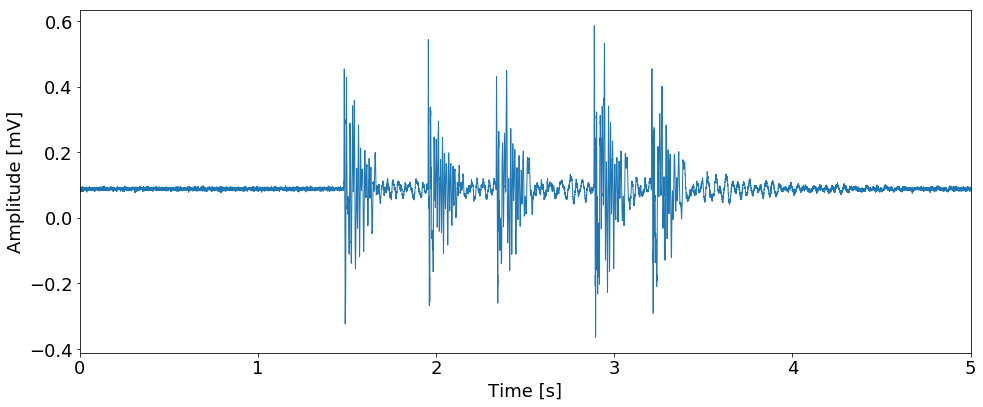

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(x, signalData[:,1], linewidth='1')
ax.set_xlim(0, x[-1])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [mV]')
fig.tight_layout()

ipd.Audio('output.wav')